In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from config import consumer_key, consumer_secret,  access_token, access_token_secret

In [14]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [16]:
# Target Account
target_user = ["BBC", "CBS","CNN", "Fox","New York times"]

# Counter
counter = 1
n_items = 100

# Variables for holding sentiments
sentiments = []
for news in target_user:
    
    for status in tweepy.Cursor(api.search, q=news).items(n_items): 
        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        tweet = status._json
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1


In [24]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sun Apr 08 04:02:30 +0000 2018,1.000,0.0,0.000,1
1,0.0772,Sun Apr 08 04:02:29 +0000 2018,0.947,0.0,0.053,2
2,0.0000,Sun Apr 08 04:02:29 +0000 2018,1.000,0.0,0.000,3
3,0.0000,Sun Apr 08 04:02:28 +0000 2018,1.000,0.0,0.000,4
4,0.0000,Sun Apr 08 04:02:27 +0000 2018,1.000,0.0,0.000,5


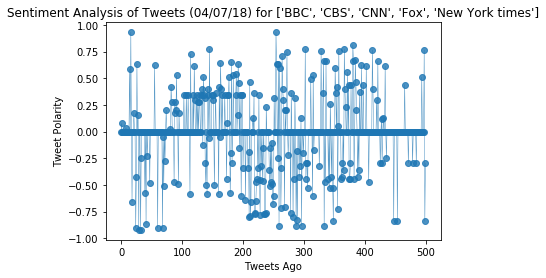

In [25]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("News_mood.png")
plt.show()

In [22]:
sentiments_pd.to_csv("News_Mood_20180407.csv")